In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
#import test and train file
#test = pd.read_csv('vikas')
train = pd.read_csv('Train_UWu5bXk.csv')

In [3]:
train['Item_Visibility'] = train['Item_Visibility'].replace(0,np.mean(train['Item_Visibility']))
train['Outlet_Establishment_Year'] = 2018 - train['Outlet_Establishment_Year']
#train['Outlet_Size'].fillna('Small',inplace=True)
#mylist = list(train.select_dtypes(include=['object']).columns)
#dummies = pd.get_dummies(train[mylist], prefix= mylist)
#train.drop(mylist, axis=1, inplace = True)
#X = pd.concat([train,dummies], axis =1 )

In [4]:
X = train.loc[:,['Item_MRP','Outlet_Establishment_Year','Item_Visibility']]

In [5]:
train.shape

(8523, 12)

In [6]:
#train_vis = train.head(200)
train_vis = train
train_vis

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,19,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,9,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,19,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.066132,Fruits and Vegetables,182.0950,OUT010,20,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.066132,Household,53.8614,OUT013,31,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,31,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,16,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,14,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,9,Medium,Tier 3,Supermarket Type2,1845.5976


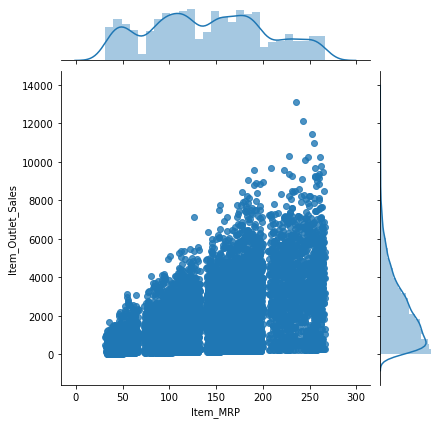

In [7]:
sns.jointplot(x=train_vis['Item_MRP'], y=train_vis['Item_Outlet_Sales'], data=train_vis, kind='reg');

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X,train.Item_Outlet_Sales, test_size=0.2, random_state=12)
#x_train

In [9]:
y_train = pd.DataFrame(y_train, columns=['Item_Outlet_Sales'])
y_train = np.reshape(y_train, (-1,1))
y_test = pd.DataFrame(y_test, columns=['Item_Outlet_Sales'])
y_test = np.reshape(y_test, (-1,1))


In [10]:
# x_train = np.reshape(x_train, (-1,1))
# y_train = np.reshape(y_train, (-1,1))
# #x_train

In [11]:
def theta_calc(x_train, y_train):
    #Initializing all variables
    n_data = x_train.shape[0]
    bias = np.ones((n_data,1))
    x_train_b = np.append(bias, x_train, axis=1)
    #
    theta_1 = np.linalg.inv(np.dot(x_train_b.T,x_train_b))
    theta_2 = np.dot(theta_1, x_train_b.T)
    theta = np.dot(theta_2,y_train)
    #
    return theta

In [12]:
def predict_func(slope,intercept,x_test):
    #
    #pred = []
    #n_data = x_test.shape[0]
    #x_test.values.tolist()
    #for i in range(n_data):
    #    pred.append(((slope * x_test[i]) + intercept).tolist)
    #temp = np.dot(slope, x_test.T)
    pred = ((np.dot(x_test, slope)) + intercept)
        
    return pred

In [13]:
def mse_calc(prediction, y_test):
    #
    #total_data = len(prediction)
    #error = 0
    error = np.mean((prediction - y_test)**2)
    return error

In [14]:
def rsq(prediction, y_test):
    #
    #total_data = len(prediction)
    #Average of total prediction 
    y_avg = np.mean(y_test)
    #total sum of square error
    tot_err = np.sum((y_test-y_avg)**2)
    #total sum of squared error of residuals
    res_err = np.sum((y_test-prediction)**2)
    #
    r2 = 1 - (res_err / tot_err)
    return r2

In [15]:
#Finding optimal theta value using normal equations
theta = theta_calc(x_train, y_train)
intercept = theta[0]
slope = theta[1:]
print('Intercept of the model', intercept)
print('Slope of the model', slope)


Intercept of the model [107.94096452]
Slope of the model [[   15.42127913]
 [   11.98516145]
 [-4931.77786663]]


In [16]:
# x_test = np.reshape(x_cv, (-1,1))
# y_test = np.reshape(y_cv, (-1,1))
# (np.dot(slope, x_cv.T)) + intercept


In [17]:
#Prediction calculation
prediction = predict_func(slope, intercept, x_test)
#MSE calculation
error =  mse_calc(prediction, y_test)
print('Mean squared error of the model', error)
#R-square calculation
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)

Mean squared error of the model Item_Outlet_Sales    1.904820e+06
dtype: float64
R squared value Item_Outlet_Sales    0.34888
dtype: float64


In [18]:
#gradient descent 
def grad_descent(s_theta, l_rate, tolerance, iter_val, x_train, y_train):
    
    n_data = len(x_train)
    bias = np.ones((n_data,1))
    s_intercept = s_theta[0]
    s_slope = s_theta[1:]
    prediction = predict_func(s_slope, s_intercept, x_train)
    error =  mse_calc(prediction, y_train)
    x_train_b = np.append(bias, x_train, axis = 1) 
    
    for i in range(iter_val):
        #int_theta = [0 for i in range(len(x_train[0]) + 1)]
        #int_intercept = 0
        n_pt = float(len(x_train))
        
        prediction = predict_func(s_slope, s_intercept, x_train)
        #prev_error = error
        #for i in range(len(x_train)):
        
        #int_intercept = 2 / n_pt * np.dot(bias.T, (prediction - y_train))
        #int_slope = 2 / n_pt * np.dot(x_train.T, (prediction - y_train))
        
        int_theta = 2 / n_pt * np.dot(x_train_b.T, (prediction - y_train))
            
        #final_slope = s_slope - (l_rate * int_slope)
        #final_intercept = s_intercept - (l_rate * int_intercept)
        #s_slope = final_slope
        #s_intercept = final_intercept
        
        s_theta -=  l_rate * int_theta
        
        #prediction = predict_func(s_slope, s_intercept, x_train)
        #error = mse_calc(prediction, y_train)
        
        #if ((prev_error - error) / prev_error) <= tolerance:
        #    break
        
    s_intercept = s_theta[0]
    s_slope = s_theta[1:]
    prediction = predict_func(s_slope, s_intercept, x_train)
    final_error = mse_calc(prediction, y_train)
        
    return  s_theta, final_error

In [19]:
#defining slope and intercept value as 0 
learning_rate = 0.00001
start_theta = np.zeros((x_train.shape[1] + 1,1))
#start_intercept = 0
max_iteration = 500
tolerance = 0.01


In [20]:
# prediction = predict_func(start_slope, start_intercept, x_train)
# prediction
# y_train = np.reshape(y_train, (-1,1))
# error =  mse_calc(prediction, y_train)
# error

In [21]:
#intial run
grad_theta, grad_error = grad_descent(start_theta, learning_rate, tolerance, max_iteration, x_train, y_train)
grad_intercept = grad_theta[0]
grad_slope = grad_theta[1:]
prediction = predict_func(grad_slope, grad_intercept, x_test)
final_e_value = mse_calc(prediction, y_test)
#
print('Slope of the model', grad_slope)
print('Intercept of the model', grad_intercept)
print('Error value of the model', final_e_value)
r2_val = rsq(prediction, y_test)
print('R squared value', r2_val)
#Graph
# plt.scatter(x_test, y_test)
# plt.plot(x_test, prediction, color='blue', linewidth = 3)
# plt.xlabel("Input")
# plt.ylabel("Output")
# plt.show()

Slope of the model [[14.94147225]
 [ 4.21579033]
 [-0.1147019 ]]
Intercept of the model [-0.01714865]
Error value of the model Item_Outlet_Sales    1.952803e+06
dtype: float64
R squared value Item_Outlet_Sales    0.332477
dtype: float64


In [22]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()
lreg.fit(x_train,y_train)
pred = lreg.predict(x_test)
mse = np.mean((pred - y_test)**2)
mse

Item_Outlet_Sales    1.904820e+06
dtype: float64

In [23]:
lreg.intercept_

array([107.94096452])

In [24]:
lreg.coef_

array([[   15.42127913,    11.98516145, -4931.77786663]])